In [99]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [100]:
X = torch.linspace(0., 50., 50).reshape(-1, 1)

torch.manual_seed(71)

e = torch.randint(-8, 9, (50, 1))
y = 2 * X + 1 + e

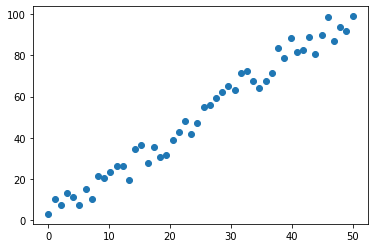

In [101]:
plt.scatter(X.numpy(), y.numpy())

In [102]:
class Model(nn.Module):

    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)

model = Model(1, 1)

In [103]:
epochs = 50
losses = []

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for i in range(epochs):
    i += 1

    y_pred = model.forward(X)

    loss = criterion(y_pred, y)

    losses.append(loss)

    print(f"epoch {i} loss: {loss}, weight: {model.linear.weight.item()}, bias: {model.linear.bias.item()}")

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


epoch 1 loss: 5645.17236328125, weight: -0.5688724517822266, bias: -0.03454399108886719
epoch 2 loss: 2661.779296875, weight: 3.782527446746826, bias: 0.09596872329711914
epoch 3 loss: 1261.2470703125, weight: 0.8010659217834473, bias: 0.008650414645671844
epoch 4 loss: 603.7781372070312, weight: 2.843777894973755, bias: 0.07057981193065643
epoch 5 loss: 295.1327819824219, weight: 1.4441331624984741, bias: 0.030249763280153275
epoch 6 loss: 150.24081420898438, weight: 2.4030494689941406, bias: 0.05998260900378227
epoch 7 loss: 82.22157287597656, weight: 1.7459771633148193, bias: 0.04171016812324524
epoch 8 loss: 50.28962707519531, weight: 2.1961138248443604, bias: 0.05632789060473442
epoch 9 loss: 35.2985725402832, weight: 1.887636423110962, bias: 0.04840954393148422
epoch 10 loss: 28.26031494140625, weight: 2.0989301204681396, bias: 0.05593090504407883
epoch 11 loss: 24.955442428588867, weight: 1.954098105430603, bias: 0.052872538566589355
epoch 12 loss: 23.403165817260742, weight: 2.

Text(0, 0.5, 'MSE Loss')

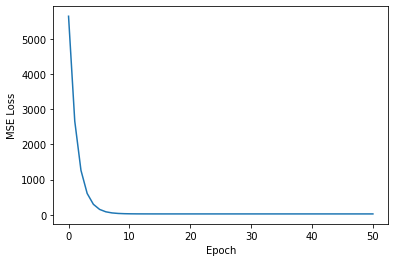

In [104]:
a = torch.linspace(0., 50., 50)

plt.plot(a, losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")

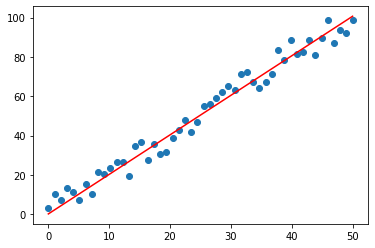

In [105]:
# Test the trained model with its hyper-parameters.
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

y_prediction = current_weight * X + current_bias

plt.scatter(X, y)
plt.plot(X, y_prediction, 'r')